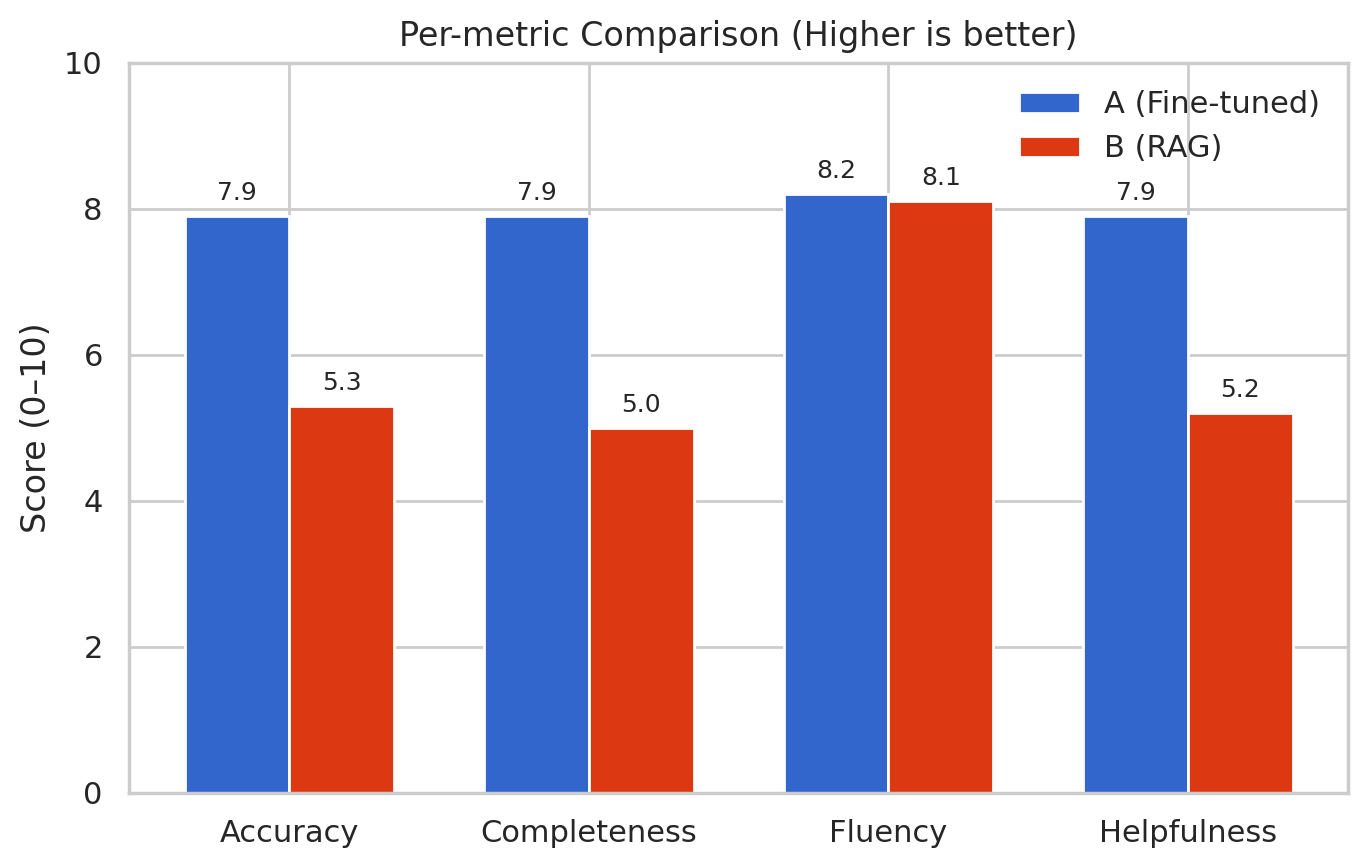

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

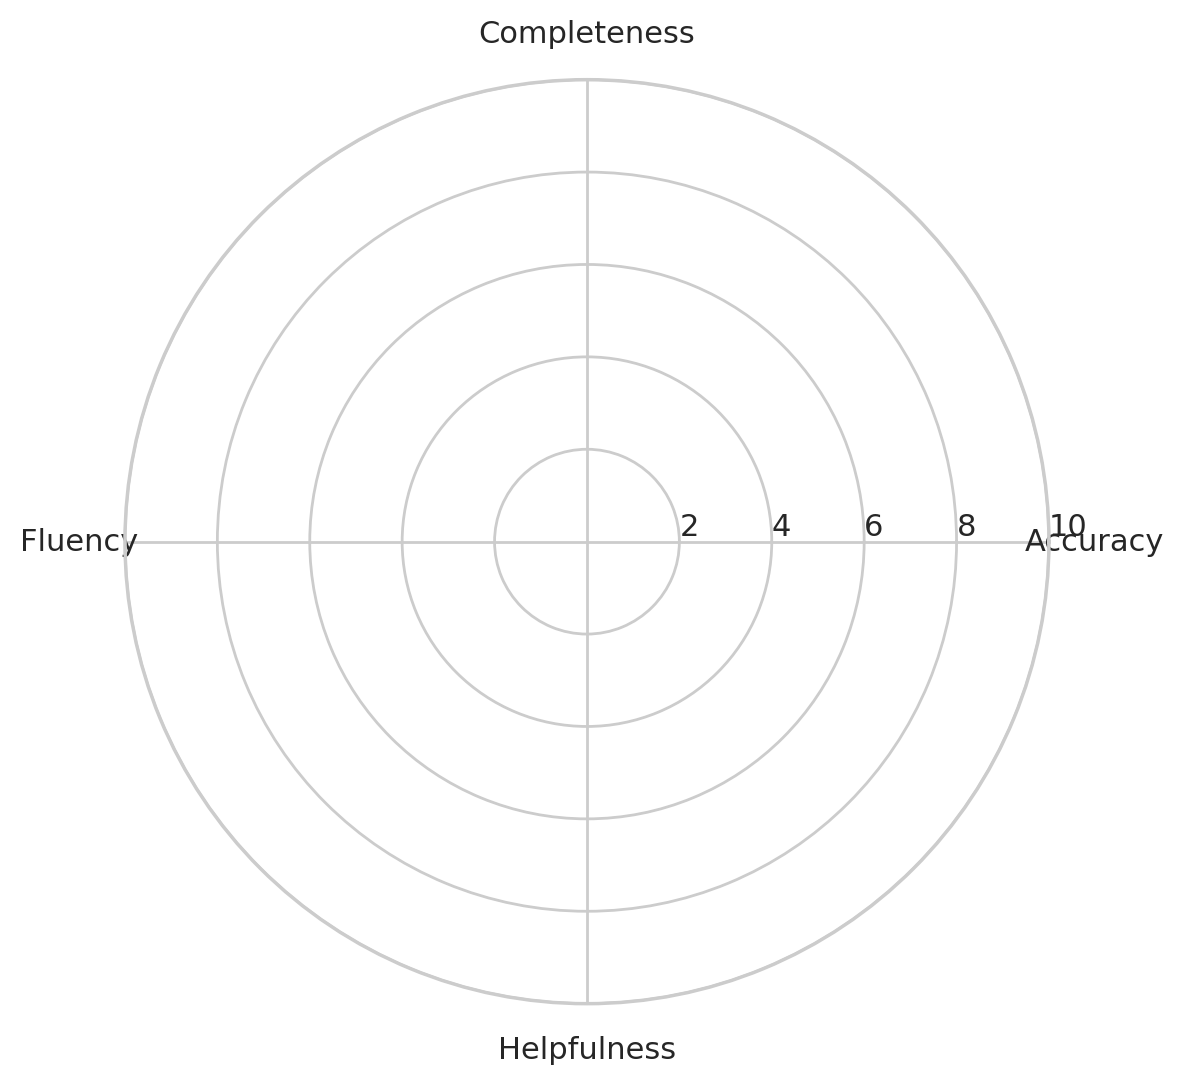

In [6]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import pi
import matplotlib as mpl

# Optional: Korean font (if installed). Otherwise, this will be ignored or may warn.
# Try NanumGothic; fallback to default.
try:
    plt.rc('font', family='NanumGothic')
except Exception:
    pass
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------
# Data (averaged from evaluation logs) <source_id data="0" title="gpt score data1" />
# -----------------------------
metrics = ["Accuracy", "Completeness", "Fluency", "Helpfulness"]
modelA = [7.9, 7.9, 8.2, 7.9]
modelB = [5.3, 5.0, 8.1, 5.2]
gpt_score_A = np.mean(modelA)  # 8.0
gpt_score_B = np.mean(modelB)  # 5.9

palette = {
    "A (Fine-tuned)": "#3366CC",
    "B (RAG)": "#DC3912"
}

# -----------------------------
# Figure 1: Per-metric Bar Chart
# -----------------------------
def plot_bar_per_metric(save_svg="fig1_per_metric.svg", save_pdf="fig1_per_metric.pdf"):
    sns.set(style="whitegrid")
    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(7.0, 4.5), dpi=200)
    ax.bar(x - width/2, modelA, width, label="A (Fine-tuned)", color=palette["A (Fine-tuned)"])
    ax.bar(x + width/2, modelB, width, label="B (RAG)", color=palette["B (RAG)"])

    ax.set_ylabel("Score (0–10)")
    ax.set_title("Per-metric Comparison (Higher is better)")
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.set_ylim(0, 10)
    ax.legend(frameon=False)

    for i, v in enumerate(modelA):
        ax.text(i - width/2, v + 0.15, f"{v:.1f}", ha="center", va="bottom", fontsize=9)
    for i, v in enumerate(modelB):
        ax.text(i + width/2, v + 0.15, f"{v:.1f}", ha="center", va="bottom", fontsize=9)

    fig.tight_layout()
    fig.savefig(save_svg)
    fig.savefig(save_pdf)
    plt.show()

# -----------------------------
# Figure 2: Radar Chart
# -----------------------------
def plot_radar(save_svg="fig2_radar.svg", save_pdf="fig2_radar.pdf"):
    categories = metrics
    N = len(categories)

    # Radar 차트는 닫힌 도형이 되어야 하므로
    # 마지막에 첫 번째 값을 한 번 더 붙여줌
    valuesA = modelA + [modelA]
    valuesB = modelB + [modelB]

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    fig = plt.figure(figsize=(6.0, 6.0), dpi=200)
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories)

    ax.set_rlabel_position(0)
    ax.set_yticks([2, 4, 6, 8, 10])
    ax.set_yticklabels(["2", "4", "6", "8", "10"])
    ax.set_ylim(0, 10)

    ax.plot(angles, valuesA, color=palette["A (Fine-tuned)"], linewidth=2)
    ax.fill(angles, valuesA, color=palette["A (Fine-tuned)"], alpha=0.20, label="A (Fine-tuned)")

    ax.plot(angles, valuesB, color=palette["B (RAG)"], linewidth=2)
    ax.fill(angles, valuesB, color=palette["B (RAG)"], alpha=0.20, label="B (RAG)")

    plt.title("Radar Chart of Averaged Metrics")
    plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.10), frameon=False)
    fig.tight_layout()
    fig.savefig(save_svg)
    fig.savefig(save_pdf)
    plt.show()
    
# -----------------------------
# Figure 3: Overall GPT-Score (Mean of metrics)
# -----------------------------
def plot_overall_gpt_score(save_svg="fig3_overall_gpt.svg", save_pdf="fig3_overall_gpt.pdf"):
    sns.set(style="whitegrid")
    labels = ["A (Fine-tuned)", "B (RAG)"]
    scores = [gpt_score_A, gpt_score_B]
    colors = [palette["A (Fine-tuned)"], palette["B (RAG)"]]

    fig, ax = plt.subplots(figsize=(4.8, 4.5), dpi=200)
    bars = ax.bar(labels, scores, color=colors)

    ax.set_ylabel("GPT-Score (Mean of 4 metrics)")
    ax.set_ylim(0, 10)
    ax.set_title("Overall GPT-Score")

    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., h + 0.15, f"{h:.1f}", ha='center', va='bottom', fontsize=10)

    fig.tight_layout()
    fig.savefig(save_svg)
    fig.savefig(save_pdf)
    plt.show()

# Run all plots
plot_bar_per_metric()
plot_radar()
plot_overall_gpt_score()

# Also export a CSV for record
with open("gpt_score_summary.csv", "w", encoding="utf-8") as f:
    f.write("Metric,Model A,Model B\n")
    for m, a, b in zip(metrics, modelA, modelB):
        f.write(f"{m},{a},{b}\n")
    f.write(f"GPT-Score (mean),{gpt_score_A:.2f},{gpt_score_B:.2f}\n")
print("Saved: fig1_per_metric.[svg|pdf], fig2_radar.[svg|pdf], fig3_overall_gpt.[svg|pdf], gpt_score_summary.csv")